### Discussion Related with Outliers and Impact on Machine Learning

#### Which Machine Learning Models are sensitive to Outliers?
1. Naivye Bayes Classifier ---------------- No
2. SVM ------------------------------------ No
3. Linear Regression --------------------- Yes
4. Logistic Regression ------------------- Yes 
5. Decision Tree Regressor or Classifier -- No 
6. Ensemble(RF, XGboost, GB) -------------- No
7. KNN ---------------- No
8. Kmeans ------------ Yes
9. Hierarichal ------- Yes 
10. PCA  ------------- Yes 
11. Neural Networks -- Yes 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

/Users/graceyu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

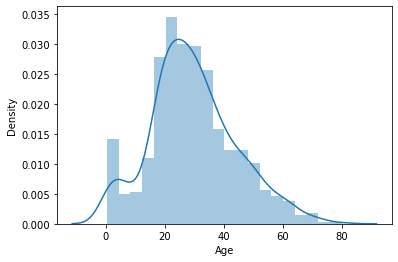

In [8]:
sns.distplot(df['Age'].dropna())

/Users/graceyu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

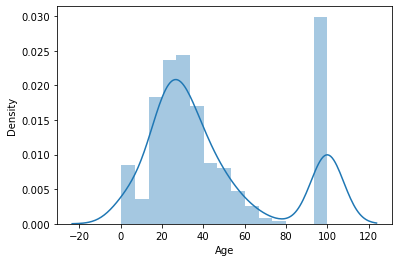

In [7]:
## create a outlier to study --- extreme knowledge analysis
sns.distplot(df['Age'].fillna(100))

#### Normal distribution 
- used 3std 

Text(0, 0.5, 'No. of passeenger')

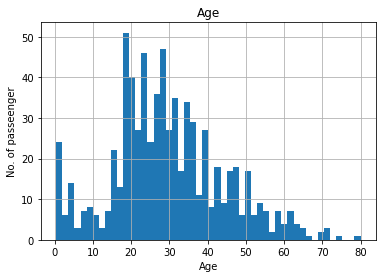

In [9]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of passeenger')

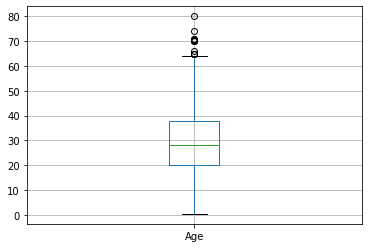

In [10]:
figure=df.boxplot(column='Age')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Normal distribution 
- we will calculate the boundaries which differentiate the outliers 
- Using 3std from the mean to set boundary

In [14]:
## Assuming Age follows normal distribution
upper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(upper_boundary), print(lower_boundary),print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


(None, None, None)

#### Features are skewed
- 1.5*IQR (outlier)
- 3*IQR (extreme outlier) -- specially for highly skewed distribution

In [15]:
### Compute the Interquantile Range to calculate the boundary (IQR)
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [17]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(upper_bridge),print(lower_bridge)

64.8125
-6.6875


(None, None)

In [18]:
### Extreme outliers -- 3*IQR
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(upper_bridge),print(lower_bridge)

91.625
-33.5


(None, None)

Text(0, 0.5, 'No. of passeenger')

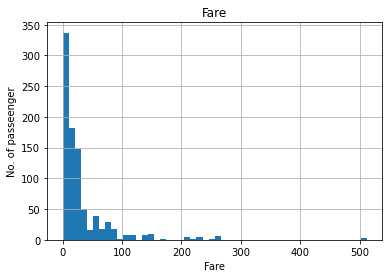

In [20]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of passeenger')

<AxesSubplot:>

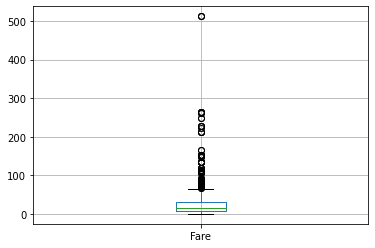

In [22]:
df.boxplot(column='Fare')

In [23]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
## Let try whether this method is work or not
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [25]:
## Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(upper_bridge),print(lower_bridge)

100.2688
-61.358399999999996


(None, None)

In [27]:
data=df.copy()

In [31]:
data.loc[data['Age']>=73,'Age']=73

Text(0, 0.5, 'No. of passeenger')

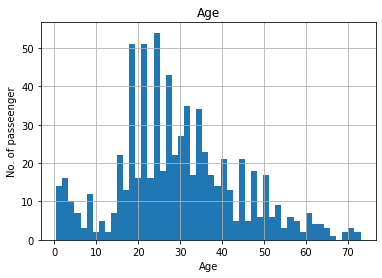

In [36]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of passeenger')

In [33]:
## replace the outlier to the max value
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No. of passeenger')

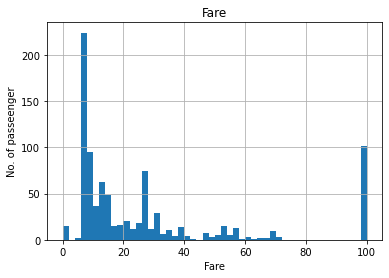

In [35]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of passeenger')

In [41]:
## test whether the model after handling the outliers 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data[['Age','Fare']].fillna(0),
                                                  data['Survived'],test_size=0.3)

In [44]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('Roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.6492537313432836
Roc_auc_score:0.6709106480159863


In [46]:
## RandomForest Regression
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('Roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.6791044776119403
Roc_auc_score:0.7230944904367684
